In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

imdb = '/content/drive/My Drive/imdb.txt'

data = pd.read_csv(imdb)
data.head()

,class,clean_text
0,0,slow moving aimless movie distressed drifting ...
1,0,not sure lost flat characters audience nearly ...
2,0,attempting artiness black white clever camera ...
3,0,little music anything speak
4,1,best scene movie gerardo trying find song keep...


In [ ]:
data['class'].value_counts()

1    384
0    362
Name: class, dtype: int64

In [ ]:
Y = data['class'].values
X = data['clean_text'].values

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33) # this is random splitting
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33) # this is random splitting


print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_bow = vectorizer.transform(X_train)
X_cv_bow = vectorizer.transform(X_cv)
X_test_bow = vectorizer.transform(X_test)

print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_cv.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100)


(334,) (334,)
(165,) (165,)
(247,) (247,)
After vectorizations
(334, 1603) (334,)
(165, 1603) (165,)
(247, 1603) (247,)


#Applying Naive Bayes

##1: Hyper parameter Tuning

###1.1 Method 1: Simple for loop(using bag of word)

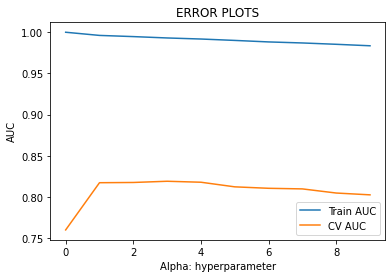

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
A = np.arange(0.001,10)
for i in A:
    Clf= MultinomialNB(alpha=i)
    Clf.fit(X_train_bow, y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_train_pred =  Clf.predict_proba(X_train_bow)[:,1]
    y_cv_pred =  Clf.predict_proba(X_cv_bow)[:,1]
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(A, train_auc, label='Train AUC')
plt.plot(A, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

### 1.2 Method 2: GridSearch or randomsearch(using bag of word)


{'alpha': 1.0001}


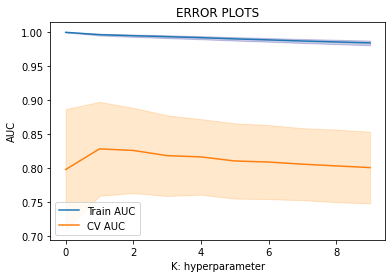

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

A = np.arange(0.0001,10)

NB = MultinomialNB()
parameters = {'alpha':np.arange(0.0001,10) }
clf = GridSearchCV(NB, parameters, cv=10, scoring='roc_auc', return_train_score=True)
clf.fit(X_train_bow, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

print(clf.best_params_)


plt.plot(A, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(A,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(A, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(A,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

##1.3 Using Kfold(using bag of word)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # split the data into x-trian,y-trian--x-test,y-test
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection # model selection is the cross validation function


The optimal number of alphas is 1.


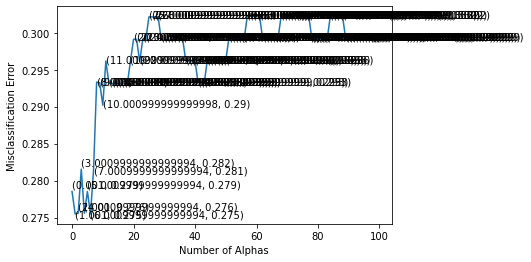

the misclassification error for each alpha value is :  [0.279 0.275 0.276 0.282 0.276 0.279 0.275 0.281 0.293 0.293 0.29  0.296
 0.293 0.293 0.293 0.293 0.293 0.293 0.293 0.296 0.299 0.299 0.296 0.299
 0.299 0.302 0.302 0.302 0.302 0.299 0.299 0.299 0.299 0.299 0.299 0.299
 0.299 0.296 0.296 0.296 0.296 0.293 0.293 0.293 0.296 0.296 0.296 0.296
 0.296 0.296 0.296 0.299 0.299 0.299 0.299 0.299 0.299 0.302 0.302 0.302
 0.302 0.302 0.299 0.299 0.299 0.299 0.299 0.299 0.302 0.302 0.302 0.302
 0.302 0.302 0.302 0.302 0.302 0.302 0.299 0.299 0.299 0.299 0.299 0.299
 0.302 0.302 0.302 0.302 0.302 0.299 0.299 0.299 0.299 0.299 0.299 0.299
 0.299 0.299 0.299 0.299]


In [ ]:
# creating odd list of alpha for Naive Bayes
alphas = np.arange(0.001,100)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for A in alphas :
    Clf= MultinomialNB(alpha=A)
    # use 10-kfold- cv on X_tr, y_tr with knn as my model & use accuracy metric 
    scores = cross_val_score(Clf, X_train_bow, y_train, cv=10, scoring='accuracy')
    # it returns me 10 kfold then we take the mean of them and append it to cv_scores 
    cv_scores.append(scores.mean())

# changing to misclassification error (ex. if acc = 90% , err = 10%)
MSE = [1 - x for x in cv_scores]

# determining best A (wich on of them has the lowest misclassification error)
optimal_A = alphas[MSE.index(min(MSE))]
print('\nThe optimal number of alphas is %d.' % optimal_A)

# plot misclassification error vs for A 
plt.plot(alphas, MSE)

for xy in zip(alphas, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Alphas')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each alpha value is : ", np.round(MSE,3))

##2. Testing with Test data(using bag of word)

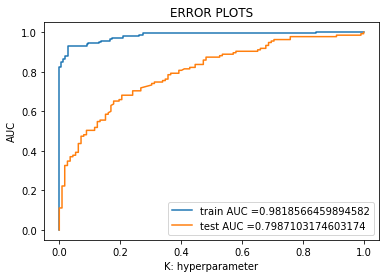

Train confusion matrix
[[162   5]
 [ 13 154]]
Test confusion matrix
[[82 30]
 [38 97]]


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


Clf= MultinomialNB(alpha=10)
Clf.fit(X_train_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train, Clf.predict_proba(X_train_bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, Clf.predict_proba(X_test_bow)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, Clf.predict(X_train_bow)))
print("Test confusion matrix")
print(confusion_matrix(y_test, Clf.predict(X_test_bow)))

##3.Using tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=5)
tf_idf_vect.fit(X_train)

X_train_tf_idf = tf_idf_vect.transform(X_train)
X_cv_tf_idf = tf_idf_vect.transform(X_cv)
X_test_tf_idf = tf_idf_vect.transform(X_test)


print("After vectorizations(TF_IDF)")
print(X_train_tf_idf.shape, y_train.shape)
print(X_cv_tf_idf.shape, y_cv.shape)
print(X_test_tf_idf.shape, y_test.shape)

After vectorizations(TF_IDF)
(334, 104) (334,)
(165, 104) (165,)
(247, 104) (247,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

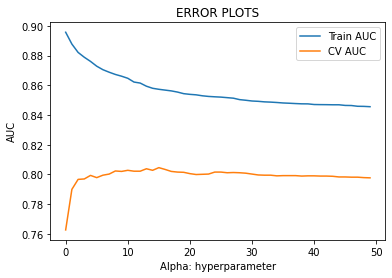

In [ ]:
# applying the loop method hyper tunning
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

train_auc = []
cv_auc = []
A = np.arange(0.001,50)
for i in A:
    Clf= MultinomialNB(alpha=i)
    Clf.fit(X_train_tf_idf, y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_train_pred =  Clf.predict_proba(X_train_tf_idf)[:,1]
    y_cv_pred =  Clf.predict_proba(X_cv_tf_idf)[:,1]
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(A, train_auc, label='Train AUC')
plt.plot(A, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

{'alpha': 0.0001}


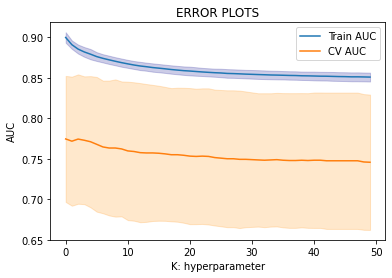

In [ ]:
# using gridsearch method hyper tunning

from sklearn.model_selection import GridSearchCV

A = np.arange(0.001,50)

NB = MultinomialNB()
parameters = {'alpha':np.arange(0.0001,50) }
clf = GridSearchCV(NB, parameters, cv=10, scoring='roc_auc', return_train_score=True)
clf.fit(X_train_tf_idf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

print(clf.best_params_)


plt.plot(A, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(A,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(A, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(A,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


The optimal number of alphas is 1.


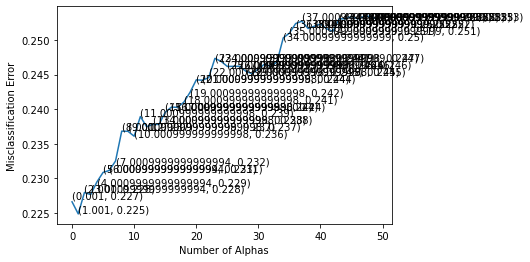

the misclassification error for each alpha value is :  [0.227 0.225 0.228 0.228 0.229 0.231 0.231 0.232 0.237 0.237 0.236 0.239
 0.237 0.238 0.238 0.24  0.24  0.24  0.241 0.242 0.244 0.244 0.245 0.247
 0.247 0.246 0.246 0.246 0.245 0.245 0.246 0.247 0.246 0.247 0.25  0.251
 0.252 0.253 0.252 0.252 0.252 0.252 0.251 0.253 0.253 0.253 0.253 0.253
 0.253 0.253]


In [ ]:
# using Kfold Hyper tunning

# creating odd list of alpha for Naive Bayes
alphas = np.arange(0.001,50)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for A in alphas :
    Clf= BernoulliNB(alpha=A)
    # use 10-kfold- cv on X_tr, y_tr with knn as my model & use accuracy metric 
    scores = cross_val_score(Clf, X_train_tf_idf, y_train, cv=10, scoring='roc_auc')
    # it returns me 10 kfold then we take the mean of them and append it to cv_scores 
    cv_scores.append(scores.mean())

# changing to misclassification error (ex. if acc = 90% , err = 10%)
MSE = [1 - x for x in cv_scores]

# determining best A (wich on of them has the lowest misclassification error)
optimal_A = alphas[MSE.index(min(MSE))]
print('\nThe optimal number of alphas is %d.' % optimal_A)

# plot misclassification error vs for A 
plt.plot(alphas, MSE)

for xy in zip(alphas, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Alphas')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each alpha value is : ", np.round(MSE,3))

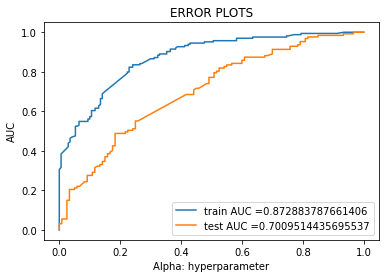

Train confusion matrix
[[146  24]
 [ 54 110]]
Test confusion matrix
[[90 30]
 [59 68]]


In [ ]:
# testing Tf-idf

from sklearn.metrics import roc_curve, auc


Clf= MultinomialNB(alpha=5)
Clf.fit(X_train_tf_idf, y_train)

train_fpr, train_tpr, thresholds = roc_curve(y_train, Clf.predict_proba(X_train_tf_idf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, Clf.predict_proba(X_test_tf_idf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, Clf.predict(X_train_tf_idf)))
print("Test confusion matrix")
print(confusion_matrix(y_test, Clf.predict(X_test_tf_idf)))